# 패키지 설치

In [1]:
import pathlib
import random
from functools import reduce
from collections import defaultdict
import json
import pandas as pd
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
import seaborn as sns

# 공간연산한 결과 데이터 표현하기 위한 패키지 
import folium
from folium import plugins
import shapely
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd
from IPython.display import display
from tqdm.notebook import tqdm
import sklearn.cluster
import tensorflow as tf
from geoband import API # API 부르기 
import pydeck as pdk
import os
from tqdm import notebook
import tqdm

import cufflinks as cf 
cf.go_offline(connected=True)
cf.set_config_file(theme='polar')
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Nanum Gothic'

from shapely.geometry import Polygon, Point
from numpy import random

#최적화 solver
import time
from mip import Model, xsum, maximize, BINARY  

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:91: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Using Python-MIP package version 1.5.3


# 데이터 불러오기

In [3]:
# 데이터 입력 - 모든 데이터는 df_로 시작 
# gpd 데이터프레임 형식 -> pydeck 분석시 판다스 데이터프레임 형태로 변환해야함
df_1= gpd.read_file('./data/1.수원시_버스정류장.csv')
df_2= gpd.read_file('./data/2.수원시_버스정류장별_승하차이력(1).csv')
df_3= gpd.read_file('./data/3.수원시_버스정류장별_승하차이력(2).csv')
df_4= gpd.read_file('./data/4.수원시_버스정류장별_승하차이력(3).csv')
df_5= gpd.read_file('./data/5.수원시_버스정류장별_승하차이력(4).csv')
df_6= gpd.read_file('./data/6.수원시_버스정류장별_승하차이력(5).csv')
df_7= gpd.read_file('./data/7.수원시_버스정류장별_노선현황.csv')
df_8= gpd.read_file('./data/8.수원시_지하철역_위치정보.csv')
df_9= gpd.read_file('./data/9.수원시_지하철역별_이용현황(2017~2019).csv')
df_10= gpd.read_file('./data/10.수원시_옥외광고물현황.csv')
df_11= gpd.read_file('./data/11.수원시_대기오염도_측정현황.csv')
df_12= gpd.read_file('./data/12.수원시_주차장현황.csv')
df_13= gpd.read_file('./data/13.수원시_기상데이터(2020).csv')
df_14= gpd.read_file('./data/14.수원시_시간대별_유동인구(2020).csv')
df_15= gpd.read_file('./data/15.수원시_성연령별_유동인구(2020).csv')
df_16= gpd.read_file('./data/16.수원시_요일별_유동인구(2020).csv')
df_17= gpd.read_file('./data/17.수원시_인구정보(고령)_격자.geojson')
df_18= gpd.read_file('./data/18.수원시_인구정보(생산가능)_격자.geojson')
df_19= gpd.read_file('./data/19.수원시_인구정보(유소년)_격자.geojson')
df_20= gpd.read_file('./data/20.수원시_교통노드.geojson')
df_21= gpd.read_file('./data/21.수원시_교통링크.geojson')
df_22= gpd.read_file('./data/22.수원시_상세도로망_LV6.geojson')
df_23= gpd.read_file('./data/23.수원시_평일_일별_시간대별_추정교통량_LV6.csv')
df_24= gpd.read_file('./data/24.수원시_평일_일별_혼잡빈도강도_LV6.csv')
df_25= gpd.read_file('./data/25.수원시_평일_일별_혼잡시간강도_LV6.csv')
df_26= gpd.read_file('./data/26.수원시_인도(2017).geojson')
df_27= gpd.read_file('./data/27.수원시_도로명주소(건물).geojson')
df_28= gpd.read_file('./data/28.수원시_건물연면적_격자.geojson')
df_29= gpd.read_file('./data/29.수원시_법정경계(시군구).geojson')
df_30= gpd.read_file('./data/30.수원시_법정경계(읍면동).geojson')
df_31= gpd.read_file('./data/31.수원시_행정경계(읍면동).geojson')
df_32= gpd.read_file('./data/32.수원시_지적도.geojson')

In [4]:
df_1 = gpd.GeoDataFrame(pd.read_csv("수원시_버스정류장_승하차이력.csv"))
subway_sum_df = gpd.GeoDataFrame(pd.read_csv("수원시_지하철역별_이용현황.csv"))
final_df = gpd.GeoDataFrame(pd.read_csv("유동인구_인구정보_결합.csv"))
road_transport_geo = gpd.GeoDataFrame(pd.read_csv("road_transport.csv"))
build_df = gpd.GeoDataFrame(pd.read_csv("build_df.csv"))
df_1_build = gpd.GeoDataFrame(pd.read_csv("정류장_빌딩_병합.csv"))
df_500 = gpd.GeoDataFrame(pd.read_csv("df_500.csv"))
df_100_to_500 = gpd.GeoDataFrame(pd.read_csv("df_100_to_500.csv"))
gid_data = gpd.GeoDataFrame(pd.read_csv("격자_데이터.csv"))

In [5]:
def str_to_geo(x):
    a = shapely.wkt.loads(x)
    return a

df_1["geometry"] = df_1["geometry"].apply(lambda x: str_to_geo(x))
#df_1["buffer"] = df_1["buffer"].astype("geometry")
#df_1["buffer"] = df_1["buffer"].apply(lambda x: str_to_geo(x))

In [6]:
subway_sum_df["geometry"] = subway_sum_df["geometry"].apply(lambda x: str_to_geo(x))
final_df["geometry"] = final_df["geometry"].apply(lambda x: str_to_geo(x))
road_transport_geo["geometry"] = road_transport_geo["geometry"].apply(lambda x: str_to_geo(x))
build_df["geometry"] = build_df["geometry"].apply(lambda x: str_to_geo(x))
df_1_build["geometry"] = df_1_build["geometry"].apply(lambda x: str_to_geo(x))
#df_1_build["buffer"] = df_1_build["buffer"].astype("geometry")
#df_100_to_500["geometry"] = df_100_to_500["geometry"].apply(lambda x: str_to_geo(x))
#df_100_to_500["gid_center"] = df_100_to_500["gid_center"].apply(lambda x: str_to_geo(x))
df_500["geometry"] = df_500["geometry"].apply(lambda x: str_to_geo(x))
#df_500["buffer"] = df_500["buffer"].astype("geometry")
df_500["buffer"] = df_500["buffer"].apply(lambda x: str_to_geo(x))

# 대기오염도,기상데이터, 교통량데이터 결합 

In [8]:
df_11.head(20) # 측정소는 8곳 24개월치 

,구분,측정월,측정소,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소(ppm),아황산가스(ppm),일산화탄소(ppm),비고,lon,lat,geometry
0,도시대기,2019.1월,고색동,62,41,0.010,0.042,0.005,0.8,,126.976384,37.252329,None
1,도시대기,2019.1월,광교동,64,36,0.008,0.053,0.004,0.8,,127.070615,37.291321,None
2,도시대기,2019.1월,신풍동,65,40,0.011,0.043,0.005,0.8,,127.010465,37.28385,None
3,도시대기,2019.1월,영통동,68,23,0.010,0.046,0.003,0.9,,127.056294,37.246901,None
4,도시대기,2019.1월,인계동,68,42,0.013,0.043,0.004,0.9,,127.028723,37.263637,None
5,도시대기,2019.1월,천천동,68,39,0.012,0.042,0.004,0.7,,126.975305,37.292877,None
6,도시대기,2019.1월,호매실동,-,-,-,-,-,-,설치전(2019.4월 설치),126.957008,37.266153,None
7,도로변,2019.1월,동수원,83,45,0.006,0.050,0.004,1.1,,127.030494,37.276744,None
8,도시대기,2019.2월,고색동,55,36,0.015,0.037,0.004,0.7,,126.976384,37.252329,None
9,도시대기,2019.2월,광교동,58,37,0.013,0.042,0.004,0.7,,127.070615,37.291321,None


In [41]:
df_11.count() # -값 삭제 안됨 

구분            192
측정월           192
측정소           192
미세먼지(㎍/㎥)     192
초미세먼지(㎍/㎥)    192
오존(ppm)       192
이산화질소(ppm)    192
아황산가스(ppm)    192
일산화탄소(ppm)    192
비고            192
lon           192
lat           192
geometry        0
CAI           192
미세먼지_점수       192
초미세먼지_점수      192
오존_점수         192
이산화질소_점수      192
아황산가스_점수      192
일산화탄소_점수      192
dtype: int64

In [9]:
df_11 = df_11[df_11['오존(ppm)']!='-'].reset_index()
# null값 행 제거 

In [10]:
df_11.count()

index         189
구분            189
측정월           189
측정소           189
미세먼지(㎍/㎥)     189
초미세먼지(㎍/㎥)    189
오존(ppm)       189
이산화질소(ppm)    189
아황산가스(ppm)    189
일산화탄소(ppm)    189
비고            189
lon           189
lat           189
geometry        0
dtype: int64

In [106]:
df_11['측정소'].value_counts()
# 호매실 동은 설치 전 3개월 때문에 3건이 부족

신풍동     24
영통동     24
천천동     24
인계동     24
고색동     24
동수원     24
광교동     24
호매실동    21
Name: 측정소, dtype: int64

In [107]:
df_11['미세먼지_점수']=0
df_11['초미세먼지_점수']=0
df_11['오존_점수']=0
df_11['이산화질소_점수']=0
df_11['아황산가스_점수']=0
df_11['일산화탄소_점수']=0

In [108]:
df_11["미세먼지(㎍/㎥)"] = df_11["미세먼지(㎍/㎥)"].astype("float")
df_11["초미세먼지(㎍/㎥)"] = df_11["초미세먼지(㎍/㎥)"].astype("float")
df_11["오존(ppm)"] = df_11["오존(ppm)"].astype("float")
df_11["이산화질소(ppm)"] = df_11["이산화질소(ppm)"].astype("float")
df_11["아황산가스(ppm)"] = df_11["아황산가스(ppm)"].astype("float")
df_11["일산화탄소(ppm)"] = df_11["일산화탄소(ppm)"].astype("float")
df_11.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       189 non-null    int64   
 1   구분          189 non-null    object  
 2   측정월         189 non-null    object  
 3   측정소         189 non-null    object  
 4   미세먼지(㎍/㎥)   189 non-null    float64 
 5   초미세먼지(㎍/㎥)  189 non-null    float64 
 6   오존(ppm)     189 non-null    float64 
 7   이산화질소(ppm)  189 non-null    float64 
 8   아황산가스(ppm)  189 non-null    float64 
 9   일산화탄소(ppm)  189 non-null    float64 
 10  비고          189 non-null    object  
 11  lon         189 non-null    object  
 12  lat         189 non-null    object  
 13  geometry    0 non-null      geometry
 14  CAI         189 non-null    int64   
 15  미세먼지_점수     189 non-null    int64   
 16  초미세먼지_점수    189 non-null    int64   
 17  오존_점수       189 non-null    int64   
 18  이산화질소_점수    189 non-null    int64   
 19  

# 대기오염지수 점수 계산 

In [14]:
# 아황산가스_지수 점수 설정 
def 아황산가스(x):
    if x >= 0 and x <= 0.020:
        return ((50-0)/(0.020-0))*(x-0)+0
    elif x >= 0.021 and x <= 0.050:
        return ((100-51)/(0.050-0.021))*(x-0.021)+51
    elif x >=0.051 and x <= 0.150:
        return((250-101)/(0.150-0.051))*(x-0.051)+101
    elif x >= 0.151 and x<= 0.4:
        return((350-251)/(0.4-0.151))*(x-0.151)+251
    else:
        return((500-351)/(1-0.401))*(x-0.401)+500

In [110]:
# 이산화질소 점수 설정 
def 이산화질소(x):
    if x >= 0 and x <= 0.03:
        return ((50-0)/(0.03-0))*(x-0)+0
    elif x >= 0.031 and x <= 0.06:
        return ((100-51)/(0.06-0.031))*(x-0.031)+51
    elif x >=0.061 and x <= 0.2:
        return((250-101)/(0.2-0.061))*(x-0.061)+101
    elif x >= 0.201 and x<= 0.6:
        return((350-251)/(0.6-0.201))*(x-0.201)+251
    else:
        return((500-351)/(2-0.601))*(x-0.601)+500

In [111]:
# 오존(ppm) 점수 설정 
def 오존(x):
    if x >= 0 and x <= 0.03:
        return ((50-0)/(0.03-0))*(x-0)+0
    elif x >= 0.031 and x <= 0.09:
        return ((100-51)/(0.09-0.031))*(x-0.031)+51
    elif x >=0.091 and x <= 0.15:
        return((250-101)/(0.15-0.091))*(x-0.091)+101
    elif x >= 0.151 and x<= 0.5:
        return((350-251)/(0.5-0.151))*(x-0.151)+251
    else:
        return((500-351)/(0.6-0.501))*(x-0.501)+500

In [112]:
# 일산화탄소_점수 설정
def 일산화탄소(x):
    if x >= 0 and x <= 2:
        return ((50-0)/(2-0))*(x-0)+0
    elif x >= 2.1 and x <= 9:
        return ((100-51)/(9-2.1))*(x-2.1)+51
    elif x >=9.1 and x <= 15:
        return((250-101)/(15-9.1))*(x-9.1)+101
    elif x >= 15.1 and x<= 30:
        return((350-251)/(30-15.1))*(x-15.1)+251
    else:
        return((500-351)/(50-30.1))*(x-30.1)+500

In [113]:
# 미세먼지PM-10(㎍/㎥)_점수 설정
def 미세먼지(x):
    if x >= 0 and x <= 30:
        return ((50-0)/(30-0))*(x-0)+0
    elif x >= 31 and x <= 80:
        return ((100-51)/(80-31))*(x-31)+51
    elif x >=81 and x <= 150:
        return((250-101)/(150-81))*(x-81)+101
    elif x >= 151 and x<= 300:
        return((350-251)/(300-151))*(x-151)+251
    else:
        return((500-351)/(600-301))*(x-301)+500

In [114]:
# 초미세먼지PM-2.5(㎍/㎥)_점수 설정
def 초미세먼지(x):
    if x >= 0 and x <= 15:
        return ((50-0)/(15-0))*(x-0)+0
    elif x >= 16 and x <= 35:
        return ((100-51)/(35-16))*(x-16)+51
    elif x >=36 and x <= 75:
        return((250-101)/(75-36))*(x-36)+101
    elif x >= 76 and x<= 250:
        return((350-251)/(250-76))*(x-76)+251
    else:
        return((500-351)/(500-251))*(x-251)+500

In [115]:
df_11['아황산가스_점수'] = df_11['아황산가스(ppm)'].apply(아황산가스)
df_11['일산화탄소_점수'] = df_11['일산화탄소(ppm)'].apply(일산화탄소)
df_11['이산화질소_점수'] = df_11['이산화질소(ppm)'].apply(이산화질소)
df_11['오존_점수'] = df_11['오존(ppm)'].apply(오존)
df_11['미세먼지_점수'] = df_11['미세먼지(㎍/㎥)'].apply(미세먼지)
df_11['초미세먼지_점수'] = df_11['초미세먼지(㎍/㎥)'].apply(초미세먼지)

In [148]:
df_11_grade =  df_11.iloc[:,15:-1]

In [149]:
df_11.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       189 non-null    int64   
 1   구분          189 non-null    object  
 2   측정월         189 non-null    object  
 3   측정소         189 non-null    object  
 4   미세먼지(㎍/㎥)   189 non-null    float64 
 5   초미세먼지(㎍/㎥)  189 non-null    float64 
 6   오존(ppm)     189 non-null    float64 
 7   이산화질소(ppm)  189 non-null    float64 
 8   아황산가스(ppm)  189 non-null    float64 
 9   일산화탄소(ppm)  189 non-null    float64 
 10  비고          189 non-null    object  
 11  lon         189 non-null    object  
 12  lat         189 non-null    object  
 13  geometry    0 non-null      geometry
 14  CAI         189 non-null    int64   
 15  미세먼지_점수     189 non-null    float64 
 16  초미세먼지_점수    189 non-null    float64 
 17  오존_점수       189 non-null    float64 
 18  이산화질소_점수    189 non-null    float64 
 19  

In [152]:
cai= []
for i in range(len(df_11_grade)):
    a=max(df_11_grade.loc[i])
    cai.append(a)

CAI 등급설정

In [159]:
cai = pd.DataFrame(cai)
df_11['CAI']=cai
df_11['CAI_GRADE']=0

In [78]:
def cai_grade(x):
    if x <= 50:
        return  "좋음"
    elif x <= 100:
        return "보통"
    elif x <=250:
        return "나쁨"
    else:
        return "매우나쁨"

In [169]:
df_11['CAI_GRADE'] = df_11['CAI'].apply(cai_grade)

In [11]:
#df_11.to_csv("air_pollution.csv",index=False)

In [ ]:
air_pollution = gpd.GeoDataFrame(pd.read_csv("./data/수원시_기상데이터.csv"))

In [46]:
air_pollution['year'] = air_pollution.측정월.str.split('.').str[0]
air_pollution['month'] = air_pollution.측정월.str.split('.').str[1]

In [47]:
air_pollution['month'] = air_pollution.month.str.split('월').str[0]
air_pollution

,index,구분,측정월,측정소,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소(ppm),아황산가스(ppm),일산화탄소(ppm),비고,lon,lat,geometry,CAI,미세먼지_점수,초미세먼지_점수,오존_점수,이산화질소_점수,아황산가스_점수,일산화탄소_점수,CAI_GRADE,year,month
0,0,도시대기,2019.1월,고색동,62.0,41.0,0.010,0.042,0.005,0.8,NaN,126.976384,37.252329,None,120.102564,82.0,120.102564,16.666667,69.586207,12.5,20.0,나쁨,2019,1
1,1,도시대기,2019.1월,광교동,64.0,36.0,0.008,0.053,0.004,0.8,NaN,127.070615,37.291321,None,101.000000,84.0,101.000000,13.333333,88.172414,10.0,20.0,나쁨,2019,1
2,2,도시대기,2019.1월,신풍동,65.0,40.0,0.011,0.043,0.005,0.8,NaN,127.010465,37.283850,None,116.282051,85.0,116.282051,18.333333,71.275862,12.5,20.0,나쁨,2019,1
3,3,도시대기,2019.1월,영통동,68.0,23.0,0.010,0.046,0.003,0.9,NaN,127.056294,37.246901,None,88.000000,88.0,69.052632,16.666667,76.344828,7.5,22.5,보통,2019,1
4,4,도시대기,2019.1월,인계동,68.0,42.0,0.013,0.043,0.004,0.9,NaN,127.028723,37.263637,None,123.923077,88.0,123.923077,21.666667,71.275862,10.0,22.5,나쁨,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,187,도시대기,2020.12월,영통동,40.0,24.0,0.015,0.034,0.003,0.7,NaN,127.056294,37.246901,None,71.631579,60.0,71.631579,25.000000,56.068966,7.5,17.5,보통,2020,12
185,188,도시대기,2020.12월,인계동,44.0,28.0,0.013,0.039,0.004,0.7,NaN,127.028723,37.263637,None,81.947368,64.0,81.947368,21.666667,64.517241,10.0,17.5,보통,2020,12
186,189,도시대기,2020.12월,천천동,43.0,26.0,0.015,0.036,0.003,0.6,NaN,126.975305,37.292877,None,76.789474,63.0,76.789474,25.000000,59.448276,7.5,15.0,보통,2020,12
187,190,도시대기,2020.12월,호매실동,44.0,27.0,0.010,0.034,0.003,0.5,NaN,126.957008,37.266153,None,79.368421,64.0,79.368421,16.666667,56.068966,7.5,12.5,보통,2020,12


# 기상데이터 결합 

In [ ]:
df_13.head() # 강수량, 적설, 지면상태  제거 

In [24]:
df_13.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   일시        8784 non-null   object  
 1   기온(°C)    8784 non-null   object  
 2   강수량(mm)   8784 non-null   object  
 3   풍속(m/s)   8784 non-null   object  
 4   습도(%)     8784 non-null   object  
 5   적설(cm)    8784 non-null   object  
 6   지면상태      8784 non-null   object  
 7   geometry  0 non-null      geometry
dtypes: geometry(1), object(7)
memory usage: 549.1+ KB


In [25]:
df_13["기온(°C)"].value_counts()
df_13 = df_13[df_13['기온(°C)']!=''].reset_index()
df_13 = df_13[df_13['풍속(m/s)']!=''].reset_index()

In [26]:
df_13["기온(°C)"] = df_13["기온(°C)"].astype("float")
df_13["풍속(m/s)"] = df_13["풍속(m/s)"].astype("float")
df_13["습도(%)"] = df_13["습도(%)"].astype("float")

In [27]:
df_13.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8780 entries, 0 to 8779
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   level_0   8780 non-null   int64   
 1   index     8780 non-null   int64   
 2   일시        8780 non-null   object  
 3   기온(°C)    8780 non-null   float64 
 4   강수량(mm)   8780 non-null   object  
 5   풍속(m/s)   8780 non-null   float64 
 6   습도(%)     8780 non-null   float64 
 7   적설(cm)    8780 non-null   object  
 8   지면상태      8780 non-null   object  
 9   geometry  0 non-null      geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 686.1+ KB


In [28]:
df_13.drop(['geometry'],axis=1, inplace=True)

In [29]:
# 불필요 변수 제거 
df_13.drop(['강수량(mm)'],axis=1, inplace=True)
df_13.drop(['지면상태'],axis=1, inplace=True)
df_13.drop(['적설(cm)'],axis=1, inplace=True)
df_13.drop(['level_0'],axis=1, inplace=True)
df_13.drop(['index'],axis=1, inplace=True)

In [32]:
df_13

,일시,기온(°C),풍속(m/s),습도(%)
0,2020-01-01 0:00,-6.0,1.5,64.0
1,2020-01-01 1:00,-6.3,2.4,74.0
2,2020-01-01 2:00,-6.2,1.6,70.0
3,2020-01-01 3:00,-5.8,1.6,65.0
4,2020-01-01 4:00,-5.4,1.3,64.0
...,...,...,...,...
8775,2020-12-31 19:00,-7.0,1.3,75.0
8776,2020-12-31 20:00,-8.0,0.3,79.0
8777,2020-12-31 21:00,-7.5,0.2,78.0
8778,2020-12-31 22:00,-6.9,0.1,78.0


In [48]:
df_13.info()
#df_13.to_csv("weather.csv",index=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8780 entries, 0 to 8779
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일시       8780 non-null   object 
 1   기온(°C)   8780 non-null   float64
 2   풍속(m/s)  8780 non-null   float64
 3   습도(%)    8780 non-null   float64
dtypes: float64(3), object(1)
memory usage: 274.5+ KB


# 기상 데이터 외부 참조

In [ ]:
# 외부데이터 참조 
temp = pd.read_csv("temperature.csv",encoding='cp949')
temp

In [121]:
temp['year'] = temp.일시.str.split('-').str[0]
temp['month'] = temp.일시.str.split('-').str[1]
temp

,일시,평균기온(℃),평균풍속(m/s),최대풍속풍향(deg),Unnamed: 4,year,month
0,2019-01-01,-1.1,1.5,320,NaN,2019,01
1,2019-02-01,0.8,1.6,340,NaN,2019,02
2,2019-03-01,6.6,1.9,270,NaN,2019,03
3,2019-04-01,11.7,1.8,90,NaN,2019,04
4,2019-05-01,18.4,2.0,270,NaN,2019,05
5,2019-06-01,22.1,1.8,250,NaN,2019,06
6,2019-07-01,25.8,2.0,110,NaN,2019,07
7,2019-08-01,26.8,1.8,110,NaN,2019,08
8,2019-09-01,22.3,1.8,160,NaN,2019,09
9,2019-10-01,16.0,1.7,90,NaN,2019,10


In [122]:
temp.info()
temp["year"] = temp["year"].astype("int")
temp["month"] = temp["month"].astype("int")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일시           24 non-null     object 
 1   평균기온(℃)      24 non-null     float64
 2   평균풍속(m/s)    24 non-null     float64
 3   최대풍속풍향(deg)  24 non-null     int64  
 4   Unnamed: 4   0 non-null      float64
 5   year         24 non-null     object 
 6   month        24 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [123]:
air_pollution.info()
air_pollution["year"] = air_pollution["year"].astype("int")
air_pollution["month"] = air_pollution["month"].astype("int")

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       189 non-null    int64   
 1   구분          189 non-null    object  
 2   측정월         189 non-null    object  
 3   측정소         189 non-null    object  
 4   미세먼지(㎍/㎥)   189 non-null    float64 
 5   초미세먼지(㎍/㎥)  189 non-null    float64 
 6   오존(ppm)     189 non-null    float64 
 7   이산화질소(ppm)  189 non-null    float64 
 8   아황산가스(ppm)  189 non-null    float64 
 9   일산화탄소(ppm)  189 non-null    float64 
 10  비고          0 non-null      float64 
 11  lon         189 non-null    float64 
 12  lat         189 non-null    float64 
 13  geometry    0 non-null      geometry
 14  CAI         189 non-null    float64 
 15  미세먼지_점수     189 non-null    float64 
 16  초미세먼지_점수    189 non-null    float64 
 17  오존_점수       189 non-null    float64 
 18  이산화질소_점수    189 non-null    float64 
 19  

In [124]:
temp = temp[['year','month','평균기온(℃)','평균풍속(m/s)','최대풍속풍향(deg)']]

In [125]:
temp

,year,month,평균기온(℃),평균풍속(m/s),최대풍속풍향(deg)
0,2019,1,-1.1,1.5,320
1,2019,2,0.8,1.6,340
2,2019,3,6.6,1.9,270
3,2019,4,11.7,1.8,90
4,2019,5,18.4,2.0,270
5,2019,6,22.1,1.8,250
6,2019,7,25.8,2.0,110
7,2019,8,26.8,1.8,110
8,2019,9,22.3,1.8,160
9,2019,10,16.0,1.7,90


In [126]:
air_pollution

,index,구분,측정월,측정소,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소(ppm),아황산가스(ppm),일산화탄소(ppm),비고,lon,lat,geometry,CAI,미세먼지_점수,초미세먼지_점수,오존_점수,이산화질소_점수,아황산가스_점수,일산화탄소_점수,CAI_GRADE,year,month
0,0,도시대기,2019.1월,고색동,62.0,41.0,0.010,0.042,0.005,0.8,NaN,126.976384,37.252329,None,120.102564,82.0,120.102564,16.666667,69.586207,12.5,20.0,나쁨,2019,1
1,1,도시대기,2019.1월,광교동,64.0,36.0,0.008,0.053,0.004,0.8,NaN,127.070615,37.291321,None,101.000000,84.0,101.000000,13.333333,88.172414,10.0,20.0,나쁨,2019,1
2,2,도시대기,2019.1월,신풍동,65.0,40.0,0.011,0.043,0.005,0.8,NaN,127.010465,37.283850,None,116.282051,85.0,116.282051,18.333333,71.275862,12.5,20.0,나쁨,2019,1
3,3,도시대기,2019.1월,영통동,68.0,23.0,0.010,0.046,0.003,0.9,NaN,127.056294,37.246901,None,88.000000,88.0,69.052632,16.666667,76.344828,7.5,22.5,보통,2019,1
4,4,도시대기,2019.1월,인계동,68.0,42.0,0.013,0.043,0.004,0.9,NaN,127.028723,37.263637,None,123.923077,88.0,123.923077,21.666667,71.275862,10.0,22.5,나쁨,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,187,도시대기,2020.12월,영통동,40.0,24.0,0.015,0.034,0.003,0.7,NaN,127.056294,37.246901,None,71.631579,60.0,71.631579,25.000000,56.068966,7.5,17.5,보통,2020,12
185,188,도시대기,2020.12월,인계동,44.0,28.0,0.013,0.039,0.004,0.7,NaN,127.028723,37.263637,None,81.947368,64.0,81.947368,21.666667,64.517241,10.0,17.5,보통,2020,12
186,189,도시대기,2020.12월,천천동,43.0,26.0,0.015,0.036,0.003,0.6,NaN,126.975305,37.292877,None,76.789474,63.0,76.789474,25.000000,59.448276,7.5,15.0,보통,2020,12
187,190,도시대기,2020.12월,호매실동,44.0,27.0,0.010,0.034,0.003,0.5,NaN,126.957008,37.266153,None,79.368421,64.0,79.368421,16.666667,56.068966,7.5,12.5,보통,2020,12


# 대기오염데이터, 기상데이터 결합

In [209]:
air = pd.merge(air_pollution,temp,how='left',on=['year','month'])

In [ ]:
#air.to_csv("air.csv",index=False)

In [14]:
air = pd.read_csv("air.csv")

In [15]:
air

,index,구분,측정월,측정소,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소(ppm),아황산가스(ppm),일산화탄소(ppm),비고,lon,lat,geometry,CAI,미세먼지_점수,초미세먼지_점수,오존_점수,이산화질소_점수,아황산가스_점수,일산화탄소_점수,CAI_GRADE,year,month,평균기온(℃),평균풍속(m/s),최대풍속풍향(deg)
0,0,도시대기,2019.1월,고색동,62.0,41.0,0.010,0.042,0.005,0.8,NaN,126.976384,37.252329,NaN,120.102564,82.0,120.102564,16.666667,69.586207,12.5,20.0,나쁨,2019,1,-1.1,1.5,320
1,1,도시대기,2019.1월,광교동,64.0,36.0,0.008,0.053,0.004,0.8,NaN,127.070615,37.291321,NaN,101.000000,84.0,101.000000,13.333333,88.172414,10.0,20.0,나쁨,2019,1,-1.1,1.5,320
2,2,도시대기,2019.1월,신풍동,65.0,40.0,0.011,0.043,0.005,0.8,NaN,127.010465,37.283850,NaN,116.282051,85.0,116.282051,18.333333,71.275862,12.5,20.0,나쁨,2019,1,-1.1,1.5,320
3,3,도시대기,2019.1월,영통동,68.0,23.0,0.010,0.046,0.003,0.9,NaN,127.056294,37.246901,NaN,88.000000,88.0,69.052632,16.666667,76.344828,7.5,22.5,보통,2019,1,-1.1,1.5,320
4,4,도시대기,2019.1월,인계동,68.0,42.0,0.013,0.043,0.004,0.9,NaN,127.028723,37.263637,NaN,123.923077,88.0,123.923077,21.666667,71.275862,10.0,22.5,나쁨,2019,1,-1.1,1.5,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,187,도시대기,2020.12월,영통동,40.0,24.0,0.015,0.034,0.003,0.7,NaN,127.056294,37.246901,NaN,71.631579,60.0,71.631579,25.000000,56.068966,7.5,17.5,보통,2020,12,-0.4,1.8,290
185,188,도시대기,2020.12월,인계동,44.0,28.0,0.013,0.039,0.004,0.7,NaN,127.028723,37.263637,NaN,81.947368,64.0,81.947368,21.666667,64.517241,10.0,17.5,보통,2020,12,-0.4,1.8,290
186,189,도시대기,2020.12월,천천동,43.0,26.0,0.015,0.036,0.003,0.6,NaN,126.975305,37.292877,NaN,76.789474,63.0,76.789474,25.000000,59.448276,7.5,15.0,보통,2020,12,-0.4,1.8,290
187,190,도시대기,2020.12월,호매실동,44.0,27.0,0.010,0.034,0.003,0.5,NaN,126.957008,37.266153,NaN,79.368421,64.0,79.368421,16.666667,56.068966,7.5,12.5,보통,2020,12,-0.4,1.8,290


In [16]:
air = air[['year','month','측정소','CAI','CAI_GRADE','평균기온(℃)','평균풍속(m/s)','최대풍속풍향(deg)','lon','lat']]

In [17]:
air = air.rename(columns = {"측정소":"center","평균기온(℃)":"temp",
                            "평균풍속(m/s)":"wind",
                          "최대풍속풍향(deg)":"direction"})    

In [18]:
air

,year,month,center,CAI,CAI_GRADE,temp,wind,direction,lon,lat
0,2019,1,고색동,120.102564,나쁨,-1.1,1.5,320,126.976384,37.252329
1,2019,1,광교동,101.000000,나쁨,-1.1,1.5,320,127.070615,37.291321
2,2019,1,신풍동,116.282051,나쁨,-1.1,1.5,320,127.010465,37.283850
3,2019,1,영통동,88.000000,보통,-1.1,1.5,320,127.056294,37.246901
4,2019,1,인계동,123.923077,나쁨,-1.1,1.5,320,127.028723,37.263637
...,...,...,...,...,...,...,...,...,...,...
184,2020,12,영통동,71.631579,보통,-0.4,1.8,290,127.056294,37.246901
185,2020,12,인계동,81.947368,보통,-0.4,1.8,290,127.028723,37.263637
186,2020,12,천천동,76.789474,보통,-0.4,1.8,290,126.975305,37.292877
187,2020,12,호매실동,79.368421,보통,-0.4,1.8,290,126.957008,37.266153


In [21]:
#air.to_csv("air.csv",index=False)

In [26]:
air = pd.read_csv("air.csv")

In [27]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       189 non-null    int64  
 1   month      189 non-null    int64  
 2   center     189 non-null    object 
 3   CAI        189 non-null    float64
 4   CAI_GRADE  189 non-null    object 
 5   temp       189 non-null    float64
 6   wind       189 non-null    float64
 7   direction  189 non-null    int64  
 8   lon        189 non-null    float64
 9   lat        189 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 14.9+ KB


In [28]:
air['center'].value_counts()

천천동     24
인계동     24
신풍동     24
고색동     24
영통동     24
광교동     24
동수원     24
호매실동    21
Name: center, dtype: int64

findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.


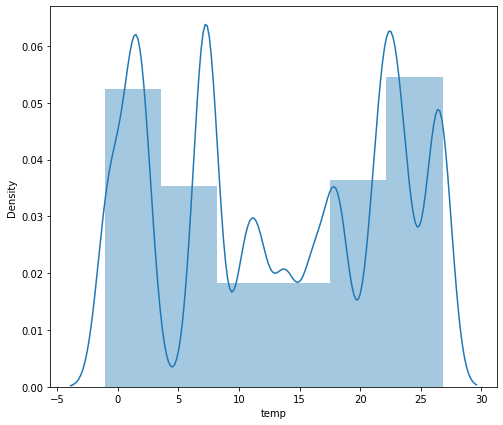

In [29]:
plt.subplots(figsize=(8,7))
sns.distplot(air['temp'], kde_kws={'bw':0.1})
plt.show() # 계절별로 묶을 필요가 있다 

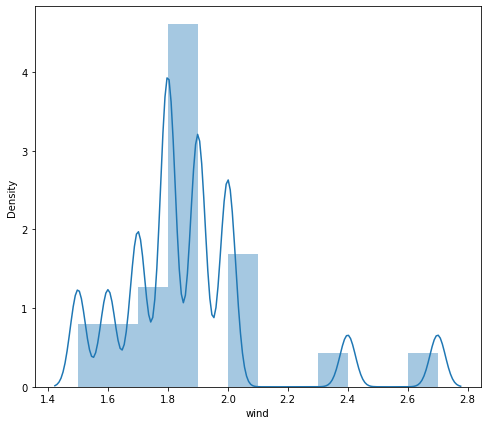

In [30]:
plt.subplots(figsize=(8,7))
sns.distplot(air['wind'], kde_kws={'bw':0.1})
plt.show() # 풍속은 몇몇 높은곳빼고 비슷하다.

In [31]:
air

,year,month,center,CAI,CAI_GRADE,temp,wind,direction,lon,lat
0,2019,1,고색동,120.102564,나쁨,-1.1,1.5,320,126.976384,37.252329
1,2019,1,광교동,101.000000,나쁨,-1.1,1.5,320,127.070615,37.291321
2,2019,1,신풍동,116.282051,나쁨,-1.1,1.5,320,127.010465,37.283850
3,2019,1,영통동,88.000000,보통,-1.1,1.5,320,127.056294,37.246901
4,2019,1,인계동,123.923077,나쁨,-1.1,1.5,320,127.028723,37.263637
...,...,...,...,...,...,...,...,...,...,...
184,2020,12,영통동,71.631579,보통,-0.4,1.8,290,127.056294,37.246901
185,2020,12,인계동,81.947368,보통,-0.4,1.8,290,127.028723,37.263637
186,2020,12,천천동,76.789474,보통,-0.4,1.8,290,126.975305,37.292877
187,2020,12,호매실동,79.368421,보통,-0.4,1.8,290,126.957008,37.266153


In [32]:
pd.crosstab(air['center'], air['CAI_GRADE'],margins=True).style.background_gradient(cmap='summer')
# 호매실동은 나쁜곳이 없다. 

CAI_GRADE,나쁨,보통,좋음,All
center,,,,
고색동,3,18,3,24
광교동,3,17,4,24
동수원,3,18,3,24
신풍동,2,20,2,24
영통동,1,22,1,24
인계동,3,18,3,24
천천동,3,19,2,24
호매실동,0,18,3,21
All,18,150,21,189


In [33]:
pd.crosstab(air['center'], air['month'],margins=True).style.background_gradient(cmap='summer')
# 호매실은 2019년 1,2,3 측정 설치전이라 하나씩 부족하다 

month,1,2,3,4,5,6,7,8,9,10,11,12,All
center,,,,,,,,,,,,,
고색동,2,2,2,2,2,2,2,2,2,2,2,2,24
광교동,2,2,2,2,2,2,2,2,2,2,2,2,24
동수원,2,2,2,2,2,2,2,2,2,2,2,2,24
신풍동,2,2,2,2,2,2,2,2,2,2,2,2,24
영통동,2,2,2,2,2,2,2,2,2,2,2,2,24
인계동,2,2,2,2,2,2,2,2,2,2,2,2,24
천천동,2,2,2,2,2,2,2,2,2,2,2,2,24
호매실동,1,1,1,2,2,2,2,2,2,2,2,2,21
All,15,15,15,16,16,16,16,16,16,16,16,16,189


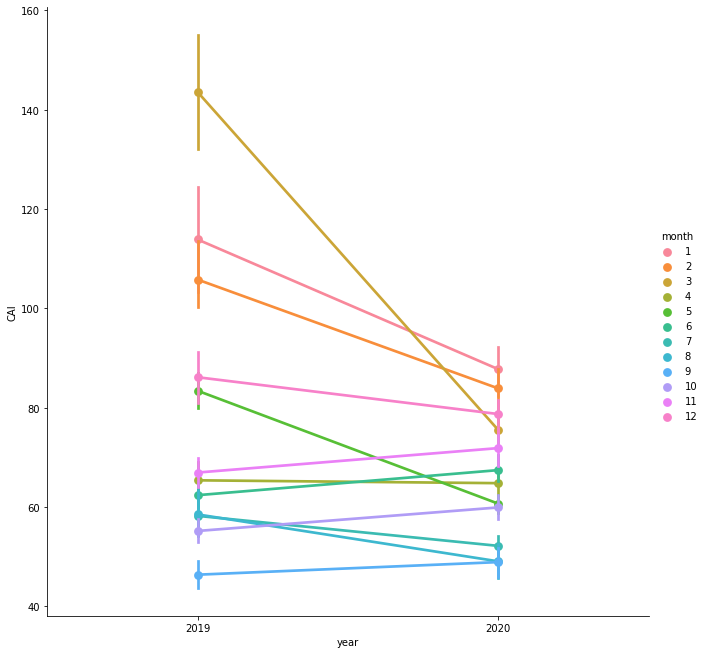

In [34]:
sns.factorplot(x= 'year', y='CAI', hue = "month",data=air, saturation=4, size=9, aspect=1)
# 11월부터~ 3월까지 대체적으로 오염지수가 높다 
# 101이상 부터 나쁨
# 51~100 보통

In [35]:
air['CAI_GRADE']= air['CAI_GRADE'].map({'나쁨' : 2, '보통':1, '좋음':0})

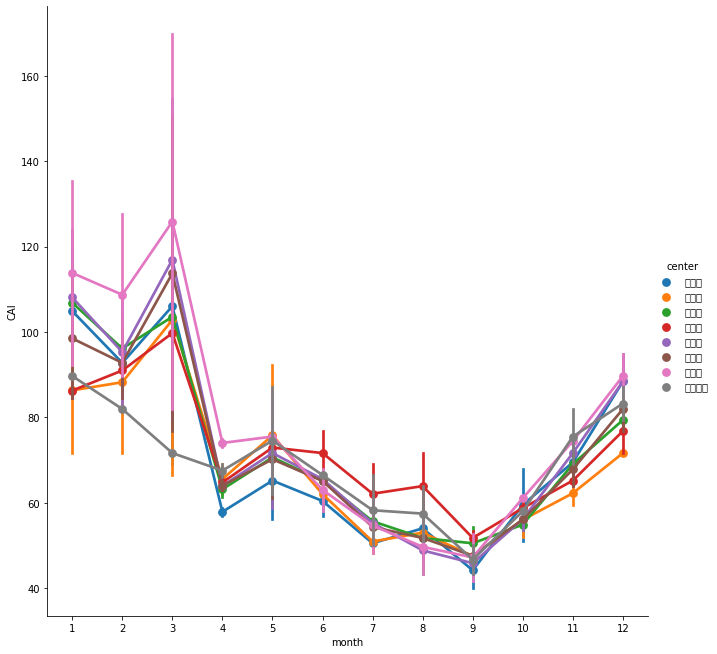

In [36]:
sns.factorplot(x= 'month', y='CAI', hue = "center",data=air, saturation=4, size=9, aspect=1)
# 분기별로 묶는 방법 고려 

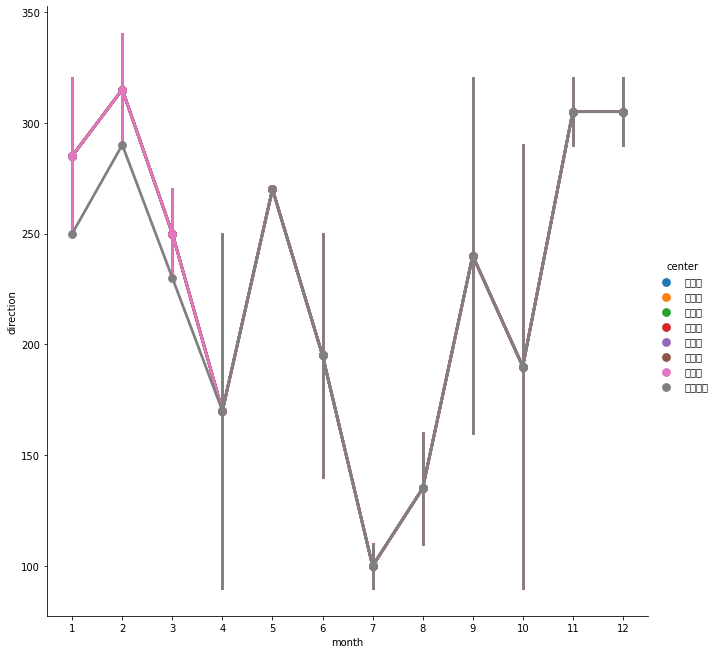

In [33]:
sns.factorplot(x= 'month', y='direction', hue = "center",data=air, saturation=4, size=9, aspect=1)
# 풍향 자체는 계절과도 관계가 있어 변수 제거 

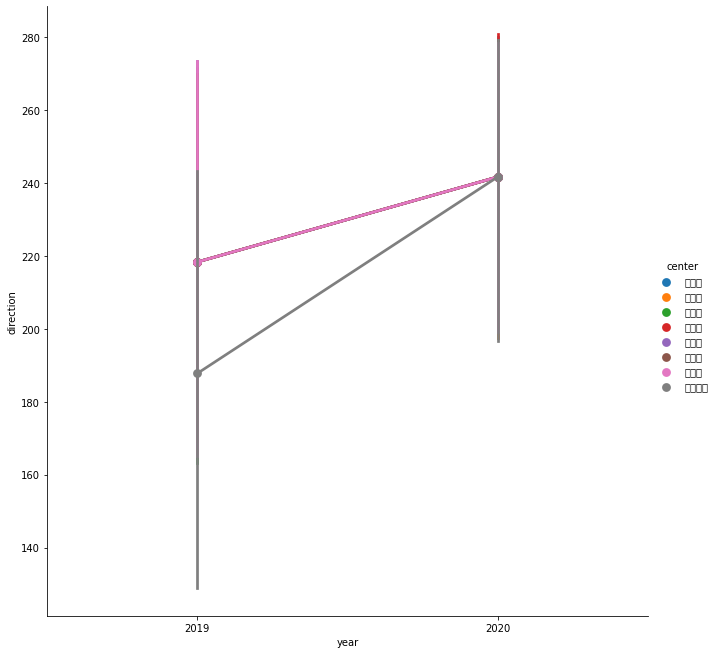

In [35]:
sns.factorplot(x= 'year', y='direction', hue = "center",data=air, saturation=4, size=9, aspect=1)

In [37]:
air.corr = air[['CAI','temp','wind','direction']]

<AxesSubplot:>

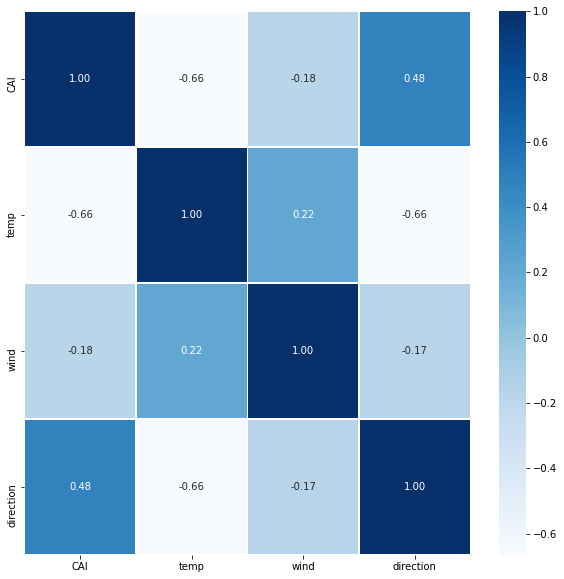

In [38]:
#  상관관계 분석
plt.figure(figsize=(10,10))
sns.heatmap(data=air.corr.corr(),annot=True,
           fmt='.2f',linewidths=.5, cmap='Blues')
# 대기오염지수와 온도,방향에 상관관계가 있다.
# 온도와 대기오염지수는 음의 상관관계가 있다. *겨울,봄에 미세먼지가 더 심하다
# 풍향과 대기오염지수는 양의 상관관계가 있다.

In [61]:
air

,year,month,center,CAI,CAI_GRADE,temp,wind,direction,lon,lat
0,2019,1,고색동,120.102564,2,-1.1,1.5,320,126.976384,37.252329
1,2019,1,광교동,101.000000,2,-1.1,1.5,320,127.070615,37.291321
2,2019,1,신풍동,116.282051,2,-1.1,1.5,320,127.010465,37.283850
3,2019,1,영통동,88.000000,1,-1.1,1.5,320,127.056294,37.246901
4,2019,1,인계동,123.923077,2,-1.1,1.5,320,127.028723,37.263637
...,...,...,...,...,...,...,...,...,...,...
184,2020,12,영통동,71.631579,1,-0.4,1.8,290,127.056294,37.246901
185,2020,12,인계동,81.947368,1,-0.4,1.8,290,127.028723,37.263637
186,2020,12,천천동,76.789474,1,-0.4,1.8,290,126.975305,37.292877
187,2020,12,호매실동,79.368421,1,-0.4,1.8,290,126.957008,37.266153


In [66]:
air_group = air.groupby(['month','center'],as_index=False)[['CAI','CAI_GRADE','temp','wind','lon','lat']].mean()

In [68]:
#air_group.to_csv("air_group.csv",index=False)

In [47]:
air_group = pd.read_csv("air_group.csv")

In [70]:
air_group

,month,center,CAI,CAI_GRADE,temp,wind,lon,lat
0,1,고색동,104.893387,1.5,0.25,1.55,126.976384,37.252329
1,1,광교동,86.315789,1.5,0.25,1.55,127.070615,37.291321
2,1,동수원,113.823887,1.5,0.25,1.55,127.030494,37.276744
3,1,신풍동,106.851552,1.5,0.25,1.55,127.010465,37.283850
4,1,영통동,86.263158,1.0,0.25,1.55,127.056294,37.246901
...,...,...,...,...,...,...,...,...
91,12,신풍동,79.368421,1.0,0.55,1.75,127.010465,37.283850
92,12,영통동,76.789474,1.0,0.55,1.75,127.056294,37.246901
93,12,인계동,88.394737,1.0,0.55,1.75,127.028723,37.263637
94,12,천천동,81.947368,1.0,0.55,1.75,126.975305,37.292877


In [72]:
# 분기값 추가 
def quarter(x):
    if x >= 1 and x <= 3:
        return 1
    elif x >= 4 and x <= 6:
        return 2
    elif x >= 7 and x <= 9:
        return 3
    else:
        return 4

In [73]:
air_group['분기']= air_group['month'].apply(quarter)

In [74]:
air_group

,month,center,CAI,CAI_GRADE,temp,wind,lon,lat,분기
0,1,고색동,104.893387,1.5,0.25,1.55,126.976384,37.252329,1
1,1,광교동,86.315789,1.5,0.25,1.55,127.070615,37.291321,1
2,1,동수원,113.823887,1.5,0.25,1.55,127.030494,37.276744,1
3,1,신풍동,106.851552,1.5,0.25,1.55,127.010465,37.283850,1
4,1,영통동,86.263158,1.0,0.25,1.55,127.056294,37.246901,1
...,...,...,...,...,...,...,...,...,...
91,12,신풍동,79.368421,1.0,0.55,1.75,127.010465,37.283850,4
92,12,영통동,76.789474,1.0,0.55,1.75,127.056294,37.246901,4
93,12,인계동,88.394737,1.0,0.55,1.75,127.028723,37.263637,4
94,12,천천동,81.947368,1.0,0.55,1.75,126.975305,37.292877,4


In [76]:
# 분기별그룹화하여 평균값 부여
air_group2 = air_group.groupby(['center','분기'],as_index=False)[['CAI','CAI_GRADE','temp','wind','lon','lat']].mean()

In [79]:
air_group2
air_group2['CAI_GRADE'] = air_group2['CAI'].apply(cai_grade)
air_group2

,center,분기,CAI,CAI_GRADE,temp,wind,lon,lat
0,고색동,1,101.231894,나쁨,2.900000,1.816667,126.976384,37.252329
1,고색동,2,61.153137,보통,17.216667,2.033333,126.976384,37.252329
2,고색동,3,49.555556,좋음,24.416667,1.900000,126.976384,37.252329
3,고색동,4,72.447368,보통,7.683333,1.700000,126.976384,37.252329
4,광교동,1,92.460414,보통,2.900000,1.816667,127.070615,37.291321
5,광교동,2,67.775201,보통,17.216667,2.033333,127.070615,37.291321
6,광교동,3,50.466102,보통,24.416667,1.900000,127.070615,37.291321
7,광교동,4,63.285239,보통,7.683333,1.700000,127.070615,37.291321
8,동수원,1,116.132029,나쁨,2.900000,1.816667,127.030494,37.276744
9,동수원,2,70.833333,보통,17.216667,2.033333,127.030494,37.276744


In [81]:
#air_group2.to_csv("air_group.csv",index=False)